In [2]:
from importlib import reload
import plot_utils as pu; reload(pu)

<module 'plot_utils' from '/mnt/fs1/ziyxiang/classes/PSYCH209FinalProject/notebooks/plot_utils.py'>

# Visualize training process, networks indeed is learning based on the contrastive objective

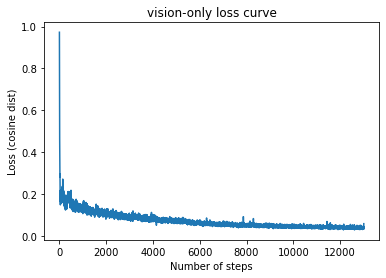

In [2]:
vision_only_path = '/mnt/fs1/ziyxiang/classes/PSYCH209FinalProject/checkpoints/vision-only_90.pth'
pu.plot_loss(vision_only_path)

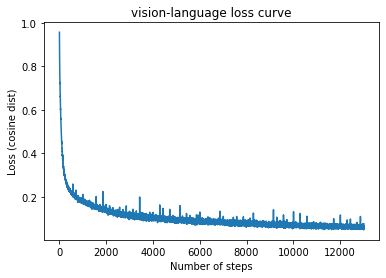

In [3]:
vision_language_path = '/mnt/fs1/ziyxiang/classes/PSYCH209FinalProject/checkpoints/vision-language_90.pth'
pu.plot_loss(vision_language_path)

# Visualization & interpretation of learned visual representations

import matplotlib.pyplot as plt
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=20)

In [23]:
import sys
sys.path.append('../')
import run_exp as rp; reload(rp)

<module 'run_exp' from '../run_exp.py'>

In [4]:
result_path = '../embeddings/'
# vision-only model args
vision_embd_path = '../embeddings/vision-only_embds.pkl'
# vision-language model args
vision_language_embd_path = '../embeddings/vision-language_embds.pkl'

In [24]:
vision_only_exp = rp.RunExp('vision-only', vision_embd_path, result_path)
vision_language_exp = rp.RunExp('vision-language', vision_language_embd_path, result_path)

## How well does the model learn category representation from the contrastive loss?

In [7]:
n_neighs = 10

### vision_only KNN score

In [8]:
vision_only_score = vision_only_exp.compute_knn_scores(n_neighs)

### vision_language KNN score

In [9]:
vision_language_score = vision_language_exp.compute_knn_scores(n_neighs)

### Plot two performance together for visualization

In [12]:
from matplotlib import pyplot as plt
def plot_bar_score(scores):
    models = list(scores.keys())
    accuracy = list(scores.values())
    rects = plt.bar(models, accuracy, color='blue', alpha=0.5)
    for i, rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % accuracy[i],
                ha='center', va='bottom')
    plt.xlabel('Model Type')
    plt.ylabel('KNN Accuracy (k=10)')
    plt.ylim(0, 1.0)
    plt.title('K Nearest Neighbor classifier accuracy')

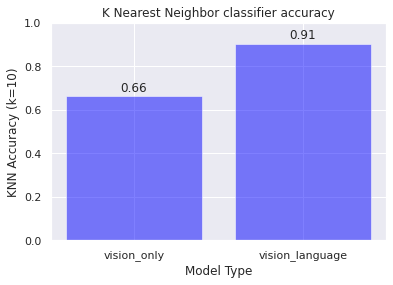

In [13]:
scores = {
    'vision_only': vision_only_score, 
    'vision_language': vision_language_score
}
plot_bar_score(scores)

### Summary of the results
Contrastive objective with only visual information and vision+language information both produce good representation for a 28-way classification task, although vision+language contrastive objective is significantly better. This suggests the model has learned general information from the similarities between visual stimuli or visual+language stimuli for object classes. This also justifies using embedding averaged across 1300 instances in each class as a "prototypical representation" of this class. And we can use these representation to study the semantic structure in the learned visual representations.

## What is the semantic structure of learned visual representations?

### vision_only

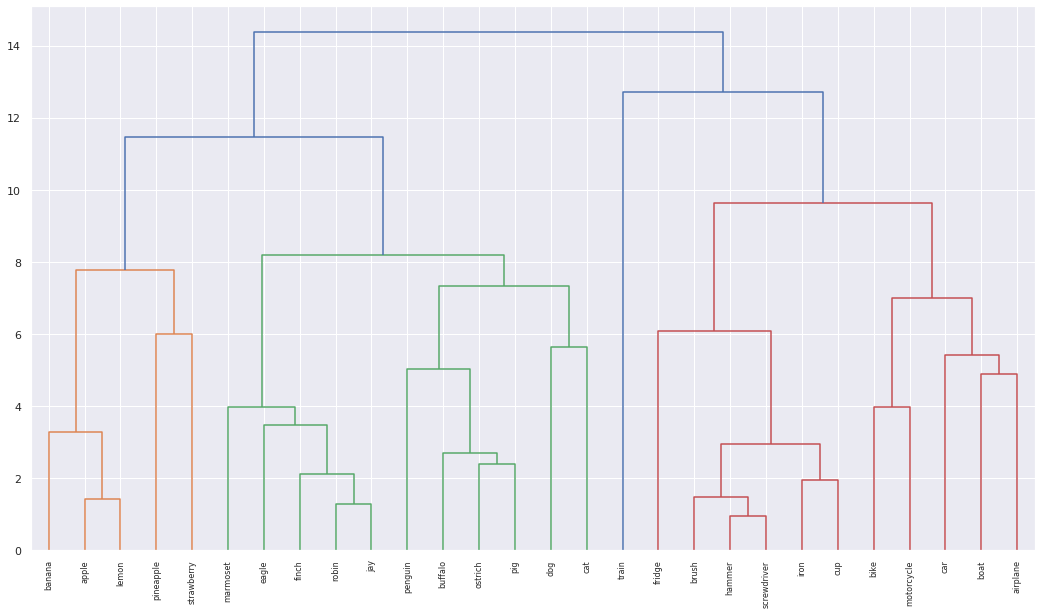

In [14]:
vision_only_exp.vis_learned_visual_embds()

### vision_language

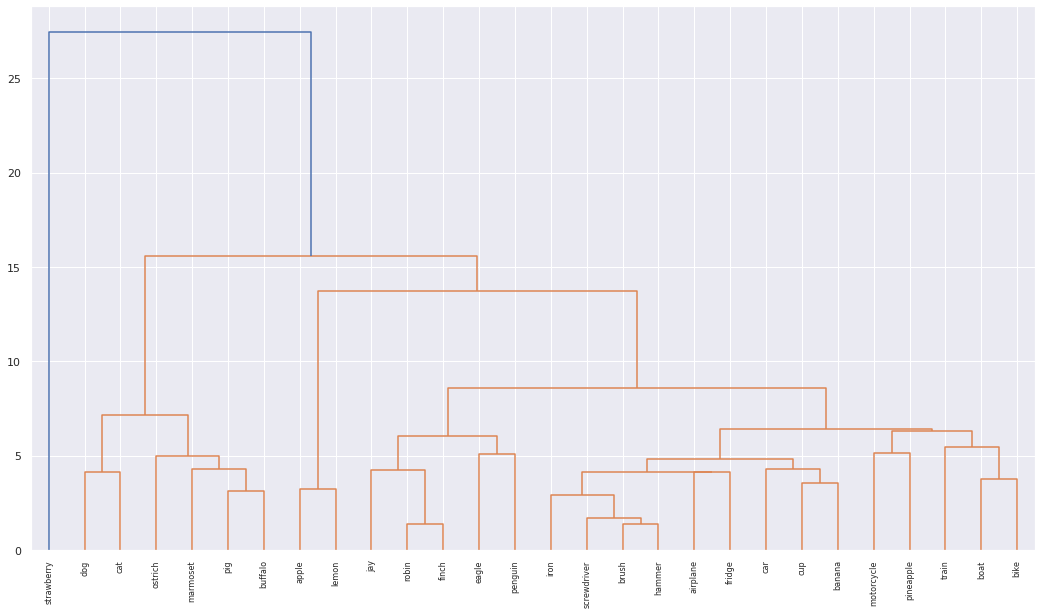

In [15]:
vision_language_exp.vis_learned_visual_embds()

## What is the relationship between the learned visual representations and similarity structure in the learning data?

### verbal stimuli

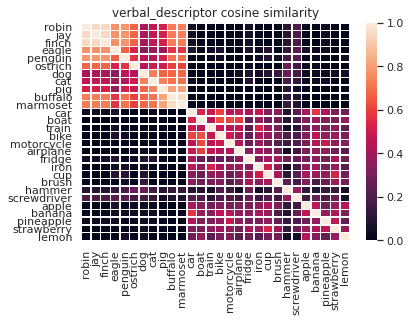

In [21]:
# Verbal input similarity
vision_only_exp.vis_input_verbal_distance()

### visual stimuli

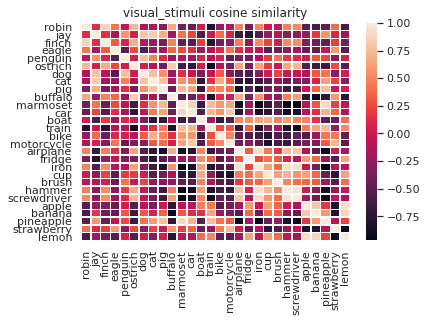

In [25]:
# Visual input similarity
vision_only_exp.vis_input_image_distance()